In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [36]:
data = pd.read_csv("/Users/kimjuhwan/Desktop/data/WISDM.csv")

In [38]:
data

,Unnamed: 0,user-id,activity,timestamp,X,Y,Z
0,0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1098198,1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098199,1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098200,1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098201,1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [39]:
count_classes = pd.value_counts(data['activity'], sort=True)
count_classes

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [40]:
data_jogging = data[data['activity'] == 'Jogging']
data_jogging

,Unnamed: 0,user-id,activity,timestamp,X,Y,Z
0,0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1080753,1080754,19,Jogging,130447441469000,-7.010000,-10.530000,0.570000
1080754,1080755,19,Jogging,130447481508000,-6.360000,-3.910000,-0.420000
1080755,1080756,19,Jogging,130447521547000,-11.260000,3.020000,1.570000
1080756,1080757,19,Jogging,130447561678000,-17.540000,4.670000,3.980000


In [41]:
data_sitting = data[data['activity'] == 'Sitting']
data_sitting

,Unnamed: 0,user-id,activity,timestamp,X,Y,Z
221333,221333,27,Sitting,12363992261000,2.60,9.66,1.035146
221334,221334,27,Sitting,12364042279000,2.68,9.53,0.503953
221335,221335,27,Sitting,12364092267000,3.49,8.89,0.762740
221336,221336,27,Sitting,12364142316000,3.64,9.38,0.926184
221337,221337,27,Sitting,12364192273000,2.91,9.34,1.035146
...,...,...,...,...,...,...,...
1098198,1098199,19,Sitting,131623331483000,9.00,-1.57,1.690000
1098199,1098200,19,Sitting,131623371431000,9.04,-1.46,1.730000
1098200,1098201,19,Sitting,131623411592000,9.08,-1.38,1.690000
1098201,1098202,19,Sitting,131623491487000,9.00,-1.46,1.730000


In [42]:
Jogging = data_jogging.head(4500).copy()
Sitting = data_sitting.head(4500).copy()

In [43]:
Jogging

,Unnamed: 0,user-id,activity,timestamp,X,Y,Z
0,0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
13015,13015,17,Jogging,58401032305000,5.434519,8.853226,3.909040
13016,13016,17,Jogging,58401203050000,-4.331271,19.531578,-1.729784
13017,13017,17,Jogging,58401432238000,-1.035146,-5.012288,-4.481094
13018,13018,17,Jogging,58401542223000,7.082581,17.243360,-0.381370


In [44]:
Sitting

,Unnamed: 0,user-id,activity,timestamp,X,Y,Z
221333,221333,27,Sitting,12363992261000,2.60,9.66,1.035146
221334,221334,27,Sitting,12364042279000,2.68,9.53,0.503953
221335,221335,27,Sitting,12364092267000,3.49,8.89,0.762740
221336,221336,27,Sitting,12364142316000,3.64,9.38,0.926184
221337,221337,27,Sitting,12364192273000,2.91,9.34,1.035146
...,...,...,...,...,...,...,...
255294,255294,36,Sitting,14927622266000,-4.33,-2.18,8.308413
255295,255295,36,Sitting,14927672254000,-4.37,-2.22,8.349273
255296,255296,36,Sitting,14927722272000,-4.29,-2.22,8.308413
255297,255297,36,Sitting,14927772199000,-4.29,-2.22,8.281172


In [118]:
balanced_data = pd.DataFrame()

In [119]:
data2 = pd.concat([balanced_data,Jogging, Sitting])
data2.shape

(9000, 7)

In [53]:
del data2['Unnamed: 0']

In [54]:
data2

,user-id,activity,timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
255294,36,Sitting,14927622266000,-4.330000,-2.180000,8.308413
255295,36,Sitting,14927672254000,-4.370000,-2.220000,8.349273
255296,36,Sitting,14927722272000,-4.290000,-2.220000,8.308413
255297,36,Sitting,14927772199000,-4.290000,-2.220000,8.281172


In [55]:
data2 = data2.rename(columns={'activity': 'Label'})

In [56]:
data2['Label'] = data2['Label'].replace('Sitting', 0)
data2['Label'] = data2['Label'].replace('Jogging', 1)

In [57]:
data2

,user-id,Label,timestamp,X,Y,Z
0,33,1,49105962326000,-0.694638,12.680544,0.503953
1,33,1,49106062271000,5.012288,11.264028,0.953424
2,33,1,49106112167000,4.903325,10.882658,-0.081722
3,33,1,49106222305000,-0.612916,18.496431,3.023717
4,33,1,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
255294,36,0,14927622266000,-4.330000,-2.180000,8.308413
255295,36,0,14927672254000,-4.370000,-2.220000,8.349273
255296,36,0,14927722272000,-4.290000,-2.220000,8.308413
255297,36,0,14927772199000,-4.290000,-2.220000,8.281172


In [58]:
del data2['user-id']
del data2['timestamp']

In [59]:
data2

,Label,X,Y,Z
0,1,-0.694638,12.680544,0.503953
1,1,5.012288,11.264028,0.953424
2,1,4.903325,10.882658,-0.081722
3,1,-0.612916,18.496431,3.023717
4,1,-1.184970,12.108489,7.205164
...,...,...,...,...
255294,0,-4.330000,-2.180000,8.308413
255295,0,-4.370000,-2.220000,8.349273
255296,0,-4.290000,-2.220000,8.308413
255297,0,-4.290000,-2.220000,8.281172


In [79]:
data2['Label'].value_counts()

1    4500
0    4500
Name: Label, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2['Label'] = le.fit_transform(data2['Label'])

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data2, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((6750, 4), (2250, 4))

In [93]:
X_train

,Label,X,Y,Z
222820,0,3.300000,9.300000,1.035146
6977,1,-4.753501,19.572440,-3.105439
253357,0,-4.990000,-2.300000,7.886181
7410,1,3.868179,2.724070,1.757025
6997,1,4.399372,11.223166,-4.562817
...,...,...,...,...
222567,0,3.260000,9.280000,1.116869
222024,0,3.210000,9.300000,1.076008
222223,0,3.490000,9.300000,0.926184
5824,1,10.528529,17.474907,6.782933


In [94]:
#Normal = 0, adnormal = 1
normal = X_train[X_train['Label'] == 0]

y_train = normal['Label']
X_train_normal_train = normal.drop(['Label'], axis=1)

y_test = X_test['Label']

X_train_ft = X_train_normal_train.values
X_test = X_test.values

X_train.shape
X_test.shape

(2250, 4)

In [95]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [96]:
#nb_epoch = 100
nb_epoch = 10
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/10
211/211 [==============================] - 1s 1ms/step - loss: 28.7774 - accuracy: 0.8110 - val_loss: 23.5056 - val_accuracy: 0.8813
Epoch 2/10
211/211 [==============================] - 0s 921us/step - loss: 20.2658 - accuracy: 0.8767 - val_loss: 18.4338 - val_accuracy: 0.8964
Epoch 3/10
211/211 [==============================] - 0s 903us/step - loss: 16.3971 - accuracy: 0.8957 - val_loss: 15.3845 - val_accuracy: 0.9253
Epoch 4/10
211/211 [==============================] - 0s 905us/step - loss: 13.8246 - accuracy: 0.9283 - val_loss: 13.2059 - val_accuracy: 0.9449
Epoch 5/10
211/211 [==============================] - 0s 916us/step - loss: 12.0314 - accuracy: 0.9444 - val_loss: 11.7021 - val_accuracy: 0.9587
Epoch 6/10
211/211 [==============================] - 0s 906us/step - loss: 10.8020 - accuracy: 0.9542 - val_loss: 10.6588 - val_accuracy: 0.9627
Epoch 7/10
211/211 [==============================] - 0s 933us/step - loss: 9.9381 - accuracy: 0.9606 - val_loss: 9.8998 - val

In [97]:
autoencoder = load_model('model.h5')

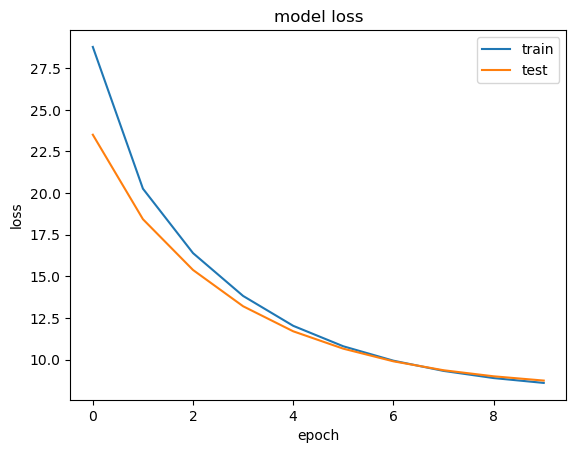

In [98]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [99]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

71/71 [==============================] - 0s 459us/step


,reconstruction_error,true_class
count,2250.000000,2250.000000
mean,8.742517,0.496889
std,11.755227,0.500101
min,0.027486,0.000000
25%,2.080199,0.000000
50%,5.843308,0.000000
75%,7.959077,1.000000
max,110.230349,1.000000


In [113]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [131]:
threshold = 1.9

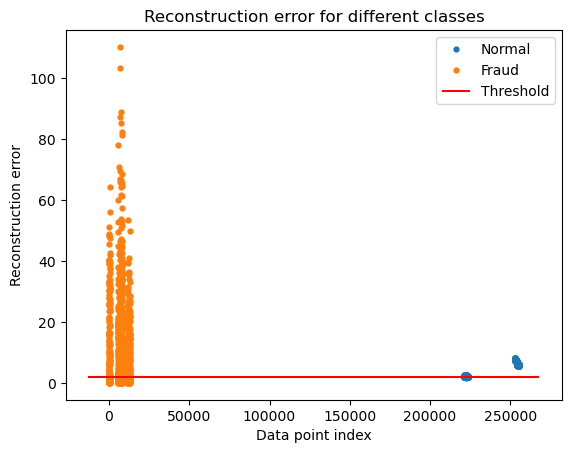

In [132]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

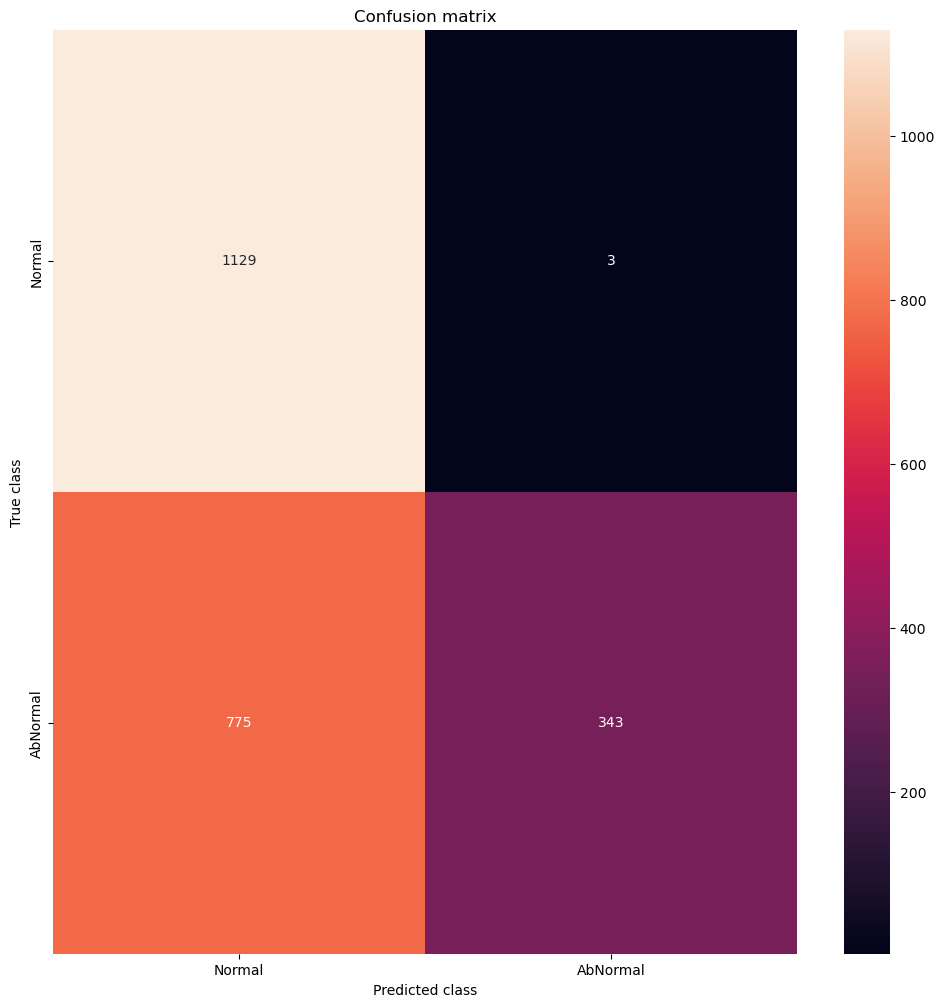

In [133]:
LABELS = ["Normal", "AbNormal"]



y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [134]:
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')

print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )

print ('Precision :',precision )

print ('Recall :',recall )

print ('F1 :',f1 )

Accuracy Score : 0.6542222222222223
Precision : 0.9913294797687862
Recall : 0.3067978533094812
F1 : 0.4685792349726776
